<a href="https://colab.research.google.com/github/MarsoL4/iot-iob-genAI/blob/main/analise_ecg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importa a função fetch_openml da biblioteca sklearn.datasets
from sklearn.datasets import fetch_openml

In [ ]:
# Busca os dados de ECG no OpenML
data_ecg = fetch_openml(data_id= 44793)

In [ ]:
# Separa os dados de entrada (features) e saída (target)
X = data_ecg.data # dados de entrada
y = data_ecg.target # dados de saida

In [ ]:
# Exibe a contagem de valores da variável alvo
y.value_counts()

,count
col_140,
1.0,2919
0.0,2079


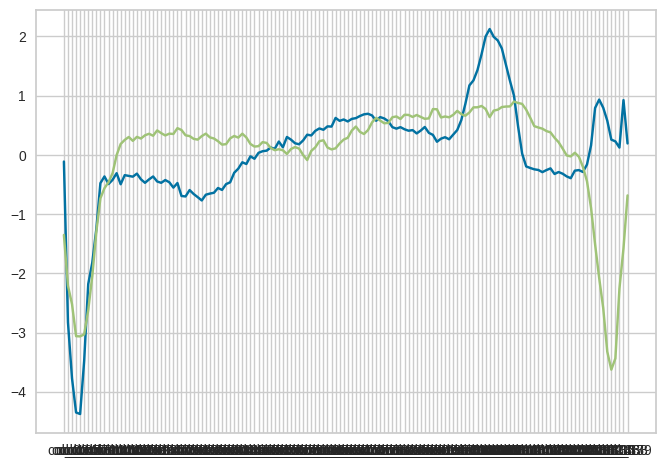

In [ ]:
# Plota os primeiros e últimos sinais de ECG
import matplotlib.pyplot as plt

plt.plot(X.iloc[0])
plt.plot(X.iloc[4997])

In [ ]:
# Instala a biblioteca pycaret
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/1

In [ ]:
# Configura o pycaret para classificação e compara modelos
from pycaret.classification import *

clf = setup(data = X, target = y, train_size = 0.8)

best = compare_models()

,Description,Value
0,Session id,6360
1,Target,col_140
2,Target type,Binary
3,Original data shape,"(4998, 141)"
4,Transformed data shape,"(4998, 141)"
5,Transformed train set shape,"(3998, 141)"
6,Transformed test set shape,"(1000, 141)"
7,Numeric features,140
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9932,0.9989,0.9966,0.9919,0.9942,0.9861,0.9861,0.4460
rf,Random Forest Classifier,0.9922,0.9986,0.9949,0.9919,0.9934,0.9840,0.9841,3.0690
lightgbm,Light Gradient Boosting Machine,0.9922,0.9992,0.9949,0.9919,0.9934,0.9840,0.9841,14.6770
knn,K Neighbors Classifier,0.9905,0.9954,0.9974,0.9865,0.9919,0.9804,0.9805,0.1640
xgboost,Extreme Gradient Boosting,0.9902,0.9987,0.9919,0.9915,0.9916,0.9799,0.9800,0.9640
gbc,Gradient Boosting Classifier,0.9900,0.9983,0.9910,0.9919,0.9914,0.9794,0.9795,18.0870
ada,Ada Boost Classifier,0.9890,0.9979,0.9923,0.9889,0.9906,0.9773,0.9774,3.5160
lr,Logistic Regression,0.9882,0.9975,0.9944,0.9857,0.9900,0.9757,0.9759,0.8210
ridge,Ridge Classifier,0.9857,0.9958,0.9906,0.9852,0.9878,0.9706,0.9708,0.0730
lda,Linear Discriminant Analysis,0.9857,0.9958,0.9901,0.9856,0.9878,0.9706,0.9708,0.0950


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# Exibe o melhor modelo encontrado pelo pycaret
best

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6360, verbose=0,
                     warm_start=False)

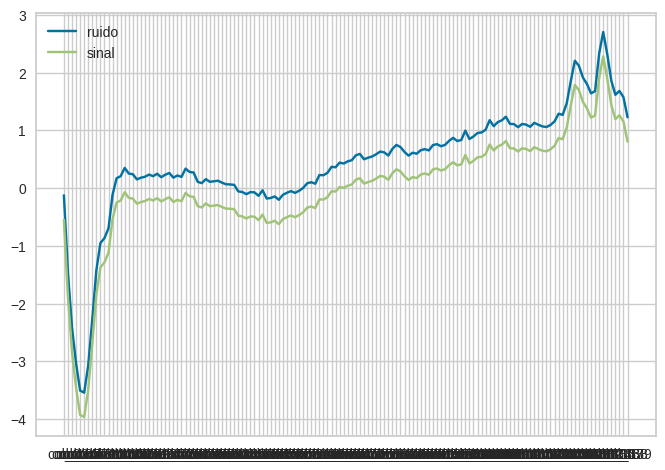

In [ ]:
# Adiciona ruído aleatório a um sinal de ECG e plota os sinais original e com ruído
import random
ruido =  random.random()
sinal_ruido = X.iloc[4996] + ruido
plt.plot(sinal_ruido, label= 'ruido')
plt.plot(X.iloc[4996], label = 'sinal')
plt.legend()

In [ ]:
# Prevê a classe do sinal com ruído usando o melhor modelo
print(f"A classifição é: {best.predict(sinal_ruido.to_frame().T)}")

A classifição é: [0.]


In [ ]:
# Cria um DataFrame pandas a partir dos dados de entrada e adiciona a coluna alvo
import pandas as pd
df = pd.DataFrame(X)
df['target'] = pd.DataFrame(y)
df.head()

# Processamento do sinal
# Não funciona! --> df.describe()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,target
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [ ]:
# Calcula várias características estatísticas para cada sinal de ECG
# Estatística
import numpy as np

# Função da Média Harmônica
def media_harmonica(vetor):
    return len(vetor) / np.sum(1/vetor)

X_array = np.array(X) # transformar os dados em vetor
# Lista de Atributos
X_media = []
X_media_geo = []
X_media_harm = []
X_var = []
X_std = []
X_min = []
X_max = []
X_median = []

# Loop para cada linha do X_array
for linhas in X_array:
  X_media.append(np.mean(linhas))
  X_media_geo.append(np.prod(linhas))
  X_media_harm.append(len(linhas) / np.sum(1/linhas))
  X_var.append(np.var(linhas))
  X_std.append(np.std(linhas))
  X_min.append(np.min(linhas))
  X_max.append(np.max(linhas))
  X_median.append(np.median(linhas))

dados = {
    "média_aritmetica": np.array(X_media),
    "média_geometrica": np.array(X_media_geo),
    "média_harmônica": np.array(X_media_harm),
    "variância": np.array(X_var),
    "desvio_padrão": np.array(X_std),
    "minimo": np.array(X_min),
    "maximo": np.array(X_max),
    "mediana": np.array(X_median)
}

In [ ]:
# Cria um DataFrame a partir das características estatísticas calculadas
df = pd.DataFrame(dados)
df.head()

,média_aritmetica,média_geometrica,média_harmônica,variância,desvio_padrão,minimo,maximo,mediana
0,4.785714e-10,9.589870e-51,2.110290,0.992857,0.996422,-4.376041,2.125341,0.123678
1,-7.507143e-10,7.495064e-66,0.247659,0.992857,0.996422,-4.506579,2.164346,0.184356
2,-6.435715e-10,6.744575e-48,-0.254895,0.992857,0.996422,-4.584095,2.262985,0.123906
3,5.214285e-10,5.786571e-51,1.891751,0.992857,0.996422,-4.318823,2.000769,0.070780
4,6.642858e-10,-1.263531e-43,-19.177899,0.992857,0.996422,-4.338224,1.741686,0.105159


In [ ]:
# Exibe o DataFrame com as características estatísticas
df

,média_aritmetica,média_geometrica,média_harmônica,variância,desvio_padrão,minimo,maximo,mediana
0,4.785714e-10,9.589870e-51,2.110290,0.992857,0.996422,-4.376041,2.125341,0.123678
1,-7.507143e-10,7.495064e-66,0.247659,0.992857,0.996422,-4.506579,2.164346,0.184356
2,-6.435715e-10,6.744575e-48,-0.254895,0.992857,0.996422,-4.584095,2.262985,0.123906
3,5.214285e-10,5.786571e-51,1.891751,0.992857,0.996422,-4.318823,2.000769,0.070780
4,6.642858e-10,-1.263531e-43,-19.177899,0.992857,0.996422,-4.338224,1.741686,0.105159
...,...,...,...,...,...,...,...,...
4993,5.285714e-10,4.325174e-46,-2.416760,0.992857,0.996422,-2.957065,2.704595,-0.146973
4994,-2.357142e-10,1.827666e-51,-0.639298,0.992857,0.996422,-3.748719,2.433375,-0.134155
4995,8.600000e-10,-9.983656e-71,-1.100801,0.992857,0.996422,-4.176790,0.985118,0.303014
4996,-2.014286e-10,1.339077e-54,0.378010,0.992857,0.996422,-3.966026,2.280888,0.030336


In [ ]:
# Adiciona a coluna alvo ao DataFrame com as características estatísticas
df['target'] = y
df.head()

,média_aritmetica,média_geometrica,média_harmônica,variância,desvio_padrão,minimo,maximo,mediana,target
0,4.785714e-10,9.589870e-51,2.110290,0.992857,0.996422,-4.376041,2.125341,0.123678,1.0
1,-7.507143e-10,7.495064e-66,0.247659,0.992857,0.996422,-4.506579,2.164346,0.184356,1.0
2,-6.435715e-10,6.744575e-48,-0.254895,0.992857,0.996422,-4.584095,2.262985,0.123906,1.0
3,5.214285e-10,5.786571e-51,1.891751,0.992857,0.996422,-4.318823,2.000769,0.070780,1.0
4,6.642858e-10,-1.263531e-43,-19.177899,0.992857,0.996422,-4.338224,1.741686,0.105159,1.0


In [ ]:
# Configura o pycaret para classificação usando as características estatísticas e compara modelos
clf_2 = setup(data = df, target = 'target', train_size = 0.8)

best_2 = compare_models()

,Description,Value
0,Session id,5784
1,Target,target
2,Target type,Binary
3,Original data shape,"(4998, 9)"
4,Transformed data shape,"(4998, 9)"
5,Transformed train set shape,"(3998, 9)"
6,Transformed test set shape,"(1000, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9532,0.9805,0.9683,0.9526,0.9603,0.9034,0.9038,0.1310
rf,Random Forest Classifier,0.9510,0.9811,0.9662,0.9510,0.9584,0.8988,0.8993,0.6930
lightgbm,Light Gradient Boosting Machine,0.9497,0.9803,0.9662,0.9489,0.9574,0.8961,0.8967,0.9350
gbc,Gradient Boosting Classifier,0.9477,0.9825,0.9645,0.9471,0.9556,0.8920,0.8924,0.7130
et,Extra Trees Classifier,0.9450,0.9807,0.9602,0.9466,0.9532,0.8864,0.8869,0.3030
ada,Ada Boost Classifier,0.9440,0.9779,0.9653,0.9406,0.9527,0.8840,0.8848,0.2480
knn,K Neighbors Classifier,0.9307,0.9640,0.9628,0.9224,0.9420,0.8561,0.8579,0.0680
dt,Decision Tree Classifier,0.9237,0.9221,0.9315,0.9378,0.9344,0.8432,0.8438,0.0460
lr,Logistic Regression,0.8929,0.9287,0.9495,0.8777,0.9120,0.7759,0.7804,0.9540
lda,Linear Discriminant Analysis,0.8894,0.9255,0.9589,0.8664,0.9102,0.7674,0.7746,0.0630


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# Instala a biblioteca tsfel
!pip install tsfel

In [ ]:
# Importa tsfel e pandas, e obtém a configuração de características estatísticas
import tsfel
import pandas as pd

cfg = tsfel.get_features_by_domain('statistical') # padrão --> (estastístico, tempo, frequência) e quântico tem que ser configurado

for linhas in X_array:
  print(linhas)
  #X_tsfel = tsfel.time_series_features_extractor(linhas, cfg)
  break

[-0.11252183 -2.8272038  -3.7738969  -4.3497511  -4.376041   -3.4749863
 -2.1814082  -1.8182865  -1.2505219  -0.47749208 -0.36380791 -0.49195659
 -0.42185509 -0.30920086 -0.4959387  -0.34211867 -0.35533627 -0.36791303
 -0.31650279 -0.41237405 -0.47167181 -0.41345783 -0.36461703 -0.44929829
 -0.47141866 -0.42477658 -0.46251673 -0.55247236 -0.47537519 -0.6942
 -0.7018681  -0.59381178 -0.66068415 -0.71383066 -0.76980688 -0.67228161
 -0.65367605 -0.63940562 -0.55930228 -0.59167032 -0.49322332 -0.46305183
 -0.30164382 -0.23273401 -0.12505488 -0.15394314 -0.0243574  -0.06560876
  0.03499926  0.06193522  0.07119542  0.12392505  0.10312371  0.22522849
  0.12868305  0.30248315  0.25727621  0.19635161  0.17938297  0.24472863
  0.34121687  0.32820441  0.40604169  0.44660507  0.42406823  0.48151204
  0.4778438   0.62408259  0.57458456  0.59801319  0.5645919   0.607979
  0.62063457  0.65625291  0.68474806  0.69427284  0.66558377  0.57579577
  0.63813479  0.61491695  0.56908343  0.46857572  0.442817